In [1]:
# Essential Libraries
import os
import sys
import numpy as np
import pandas as pd

# ML
from sklearn import datasets as dt
from sklearn.model_selection import train_test_split

# Plots
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('seaborn-whitegrid')

# Display options
pd.set_option('display.max_columns', None);
pd.options.display.max_seq_items = 8000;
pd.options.display.max_rows = 8000;
%precision 6

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore")

# Define data and image directory
PROJECT_ROOT_DIR = "."
DATA_DIR = os.path.join(PROJECT_ROOT_DIR, "data")
IMAGE_DIR = os.path.join(PROJECT_ROOT_DIR, "img")

from IPython.display import Image
for d in [DATA_DIR, IMAGE_DIR]:
    if not os.path.exists(d):
        os.mkdir(d)

# Define a function to save images
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# Make threshold a -ve value if you want to run exactly
# max_iterations.
def gradient_descent(max_iterations,threshold,w_init,
                     obj_func,grad_func,extra_param = [],
                     learning_rate=0.05,momentum=0.8):
    
    w = w_init
    w_history = w
    f_history = obj_func(w,extra_param)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        delta_w = -learning_rate*grad_func(w,extra_param) + momentum*delta_w
        w = w+delta_w
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w,extra_param)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history

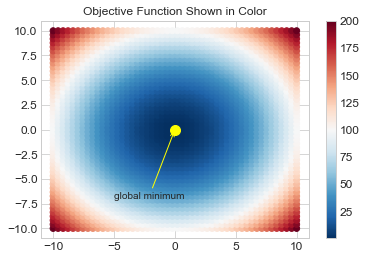

In [3]:
def visualize_fw():
    xcoord = np.linspace(-10.0,10.0,50)
    ycoord = np.linspace(-10.0,10.0,50)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))
    
    # All 2D points on the grid
    pts = pts.transpose()
    
    # Function value at each point
    f_vals = np.sum(pts*pts,axis=1)
    function_plot(pts,f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts,f_vals

# Helper function to annotate a single point
def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='o',markersize=10,c=color)
    plt.annotate(text,xy=xy,xytext=xytext,
                 # color=color,
                 arrowprops=dict(arrowstyle="->",
                 color = color,
                 connectionstyle='arc3'))

# Plot the function
# Pts are 2D points and f_val is the corresponding function value
def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1],
                         c=f_val,vmin=min(f_val),vmax=max(f_val),
                         cmap='RdBu_r')
    plt.colorbar(f_plot)
    # Show the optimal point
    annotate_pt('global minimum',(0,0),(-5,-7),'yellow')    

pts,f_vals = visualize_fw()

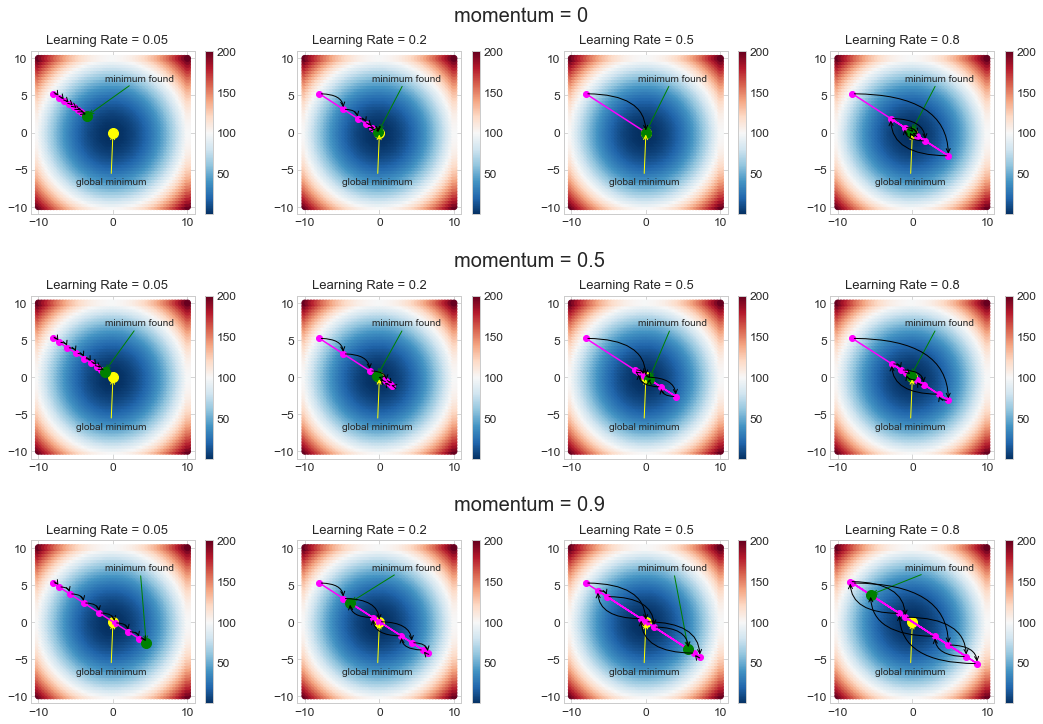

In [4]:
# Objective function
def f(w,extra=[]):
    return np.sum(w*w)

# Function to compute the gradient
def grad(w,extra=[]):
    return 2*w

# Function to plot the objective function
# and learning history annotated by arrows
# to show how learning proceeded
def visualize_learning(w_history):  
    
    # Make the function plot
    function_plot(pts,f_vals)
    
    # Plot the history
    plt.plot(w_history[:,0],w_history[:,1],marker='o',c='magenta') 
    
    # Annotate the point found at last iteration
    annotate_pt('minimum found',
                (w_history[-1,0],w_history[-1,1]),
                (-1,7),'green')
    iter = w_history.shape[0]
    for w,i in zip(w_history,range(iter-1)):
        # Annotate with arrows to show history
        plt.annotate("",
                    xy=w, xycoords='data',
                    xytext=w_history[i+1,:], textcoords='data',
                    arrowprops=dict(arrowstyle='<-',
                            connectionstyle='angle3'))     
    
def solve_fw():
    # Setting up
    rand = np.random.RandomState(19)
    w_init = rand.uniform(-10,10,2)
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))
    learning_rates = [0.05,0.2,0.5,0.8]
    momentum = [0,0.5,0.9]
    ind = 1
    
    # Iteration through all possible parameter combinations
    for alpha in momentum:
        for eta,col in zip(learning_rates,[0,1,2,3]):
            plt.subplot(3,4,ind)        
            w_history,f_history = gradient_descent(8,-1,w_init, f,grad,[],eta,alpha)
            
            visualize_learning(w_history)
            ind = ind+1
            plt.text(-9, 12,'Learning Rate = '+str(eta),fontsize=13)
            if col==1:
                plt.text(10,15,'momentum = ' + str(alpha),fontsize=20)

    fig.subplots_adjust(hspace=0.5, wspace=.3)
    plt.show()
    
solve_fw()